In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None) 

Базы данных 2024-2025 Олимпиады ДАНО
База данных: SM Lab: воронка онлайн-продаж

https://drive.google.com/drive/folders/1_v2FwQ-bbSuoGl_pi-3szrqNshJTlEn1

Данные содержат информацию о взаимодействии пользователей с диджитал каналами Спортмастера (мобильное приложение, сайт) в период с 01.06.2024 по 21.06.2024. 


Исследовательская задача:
Проанализировать ключевые факторы, влияющие на конверсию пользователей диджитал каналов Спортмастера, и предложить пути оптимизации

## Чтение данных и преобработка

In [6]:
df = pd.read_csv('sm_verySmall_random.csv')

In [7]:
df.head()

,device_type,event_id,user_id,user_is_authorized,location_id,create_timestamp,product_id,product_is_pick_up,product_is_pick_point,product_is_delivery,product_is_now,product_price,product_category,product_gender,product_age,brand_lvl,add_to_cart_flag,create_order_flag
0,desktop,044bb490-c344-4947-9d34-e61cc0171bbb,14,0,2270,2024-06-02T16:15:52.826Z,20864,1,1,1,0,5599,инвентарь,унисекс,взрослые,2,0,0
1,mobileapp_android,c1deba65-7b82-4fa8-848e-363f8745bccd,45,0,2080,2024-06-21T02:10:03.551Z,34819,1,1,1,1,3599,одежда,мужской,взрослые,0,0,0
2,desktop,a60f006c-cc65-4e4d-841c-627a2d7f4f54,108,0,968,2024-06-01T14:35:00.154Z,44123,0,1,1,1,8499,одежда,мужской,взрослые,1,0,0
3,desktop,5d00c0b7-1824-4f0d-94a1-d912b6490a28,145,0,725,2024-06-08T20:23:02.677Z,58259,1,1,1,0,4874,обувь,женский,взрослые,1,0,0
4,desktop,57035133-63bd-406b-916b-f7574f7e3827,145,0,725,2024-06-08T18:30:02.839Z,58257,1,1,1,1,4874,обувь,мужской,взрослые,1,0,0


In [8]:
df['create_timestamp'] = pd.to_datetime(df['create_timestamp'], format = 'ISO8601')
df['datetime_create'] = df['create_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['datetime_create'] = pd.to_datetime(df['datetime_create'], format = '%Y-%m-%d %H:%M:%S')

In [9]:
df.isna().mean()

device_type              0.0
event_id                 0.0
user_id                  0.0
user_is_authorized       0.0
location_id              0.0
create_timestamp         0.0
product_id               0.0
product_is_pick_up       0.0
product_is_pick_point    0.0
product_is_delivery      0.0
product_is_now           0.0
product_price            0.0
product_category         0.0
product_gender           0.0
product_age              0.0
brand_lvl                0.0
add_to_cart_flag         0.0
create_order_flag        0.0
datetime_create          0.0
dtype: float64

В дата сете отсутствует информация о скидке. Будем считать, что product_price - цена со скидкой

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99617 entries, 0 to 99616
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   device_type            99617 non-null  object             
 1   event_id               99617 non-null  object             
 2   user_id                99617 non-null  int64              
 3   user_is_authorized     99617 non-null  int64              
 4   location_id            99617 non-null  int64              
 5   create_timestamp       99617 non-null  datetime64[ns, UTC]
 6   product_id             99617 non-null  int64              
 7   product_is_pick_up     99617 non-null  int64              
 8   product_is_pick_point  99617 non-null  int64              
 9   product_is_delivery    99617 non-null  int64              
 10  product_is_now         99617 non-null  int64              
 11  product_price          99617 non-null  int64          

In [11]:
df.describe()

,user_id,user_is_authorized,location_id,product_id,product_is_pick_up,product_is_pick_point,product_is_delivery,product_is_now,product_price,add_to_cart_flag,create_order_flag,datetime_create
count,9.961700e+04,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617.000000,99617
mean,1.061812e+06,0.871267,1652.384473,45986.931327,0.724415,0.920817,0.926248,0.431282,5150.106769,0.188622,0.050905,2024-06-10 13:54:53.979972864
min,1.400000e+01,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,2024-06-01 00:00:03
25%,6.162370e+05,1.000000,968.000000,34679.000000,0.000000,1.000000,1.000000,0.000000,1599.000000,0.000000,0.000000,2024-06-05 11:36:41
50%,1.064676e+06,1.000000,1703.000000,49275.000000,1.000000,1.000000,1.000000,0.000000,3039.000000,0.000000,0.000000,2024-06-10 10:36:36
75%,1.529310e+06,1.000000,2147.000000,56271.000000,1.000000,1.000000,1.000000,1.000000,5599.000000,0.000000,0.000000,2024-06-15 11:45:05
max,2.107855e+06,1.000000,4678.000000,90604.000000,1.000000,1.000000,1.000000,1.000000,991600.000000,1.000000,1.000000,2024-06-21 09:20:01
std,5.431498e+05,0.334906,606.272037,16905.222323,0.446811,0.270026,0.261369,0.495258,9650.805875,0.391210,0.219805,NaN


In [12]:
df.describe(include='object')

,device_type,event_id,product_category,product_gender,product_age,brand_lvl
count,99617,99617,99617,99617,99617,99617
unique,3,99617,3,3,3,6
top,mobileapp_android,54ea8d4a-730d-4972-a53e-957164f5176c,одежда,мужской,взрослые,2
freq,56175,1,47597,46888,88359,39557


# EDA

In [14]:
df[df['create_order_flag']==1]

,device_type,event_id,user_id,user_is_authorized,location_id,create_timestamp,product_id,product_is_pick_up,product_is_pick_point,product_is_delivery,product_is_now,product_price,product_category,product_gender,product_age,brand_lvl,add_to_cart_flag,create_order_flag,datetime_create
26,desktop,f3c3e919-01b7-4190-a554-cb76298c6c9c,1003,0,968,2024-06-14 23:08:31.982000+00:00,60030,1,1,1,0,13199,обувь,женский,взрослые,0,1,1,2024-06-14 23:08:31
2903,desktop,06bd6282-cfbf-4a4e-9992-71afde157d22,137836,0,1028,2024-06-05 20:12:57.691000+00:00,47726,1,1,1,0,1299,одежда,женский,дети,1,1,1,2024-06-05 20:12:57
2904,desktop,c4280d45-7f13-4846-813e-308919539741,137836,0,1028,2024-06-05 20:13:32.790000+00:00,47726,1,1,1,0,1299,одежда,женский,дети,1,1,1,2024-06-05 20:13:32
2962,desktop,116b0310-13a5-4ffa-acb1-551e8170f615,140465,0,968,2024-06-02 17:30:14.287000+00:00,11399,1,1,1,0,249,инвентарь,унисекс,взрослые,2,1,1,2024-06-02 17:30:14
3399,desktop,6ef826a8-9c8a-4b85-ab87-50e1cc43ff8a,161175,0,968,2024-06-19 11:18:09.209000+00:00,63805,0,1,1,1,18199,инвентарь,унисекс,взрослые,0,1,1,2024-06-19 11:18:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98366,desktop,394d6917-ff0a-468a-975a-94cb7df4b559,2054561,0,2266,2024-06-14 13:58:10.909000+00:00,29928,1,1,1,0,1199,инвентарь,унисекс,взрослые,2,1,1,2024-06-14 13:58:10
98451,desktop,3477efcb-db38-4bda-be33-fc7596b273c5,2057327,0,725,2024-06-14 01:02:48.573000+00:00,6789,1,1,1,0,449,одежда,унисекс,взрослые,1,1,1,2024-06-14 01:02:48
98551,desktop,596b18c0-68ad-4425-bbb0-318a65aee949,2061921,0,2124,2024-06-11 13:00:08.520000+00:00,49088,1,1,1,0,4249,обувь,мужской,взрослые,2,1,1,2024-06-11 13:00:08
99276,desktop,db94b29f-5176-4c01-a3ab-0e40f9be837f,2093355,0,1793,2024-06-18 19:02:11.549000+00:00,28956,1,1,1,0,1299,одежда,унисекс,взрослые,1,1,1,2024-06-18 19:02:11


In [15]:
df[df['user_id']==137836]

,device_type,event_id,user_id,user_is_authorized,location_id,create_timestamp,product_id,product_is_pick_up,product_is_pick_point,product_is_delivery,product_is_now,product_price,product_category,product_gender,product_age,brand_lvl,add_to_cart_flag,create_order_flag,datetime_create
2902,desktop,de8de233-b311-4e8f-a8a4-88b3061af563,137836,0,1028,2024-06-05 20:16:29.316000+00:00,47705,1,1,1,0,1499,одежда,женский,дети,1,0,0,2024-06-05 20:16:29
2903,desktop,06bd6282-cfbf-4a4e-9992-71afde157d22,137836,0,1028,2024-06-05 20:12:57.691000+00:00,47726,1,1,1,0,1299,одежда,женский,дети,1,1,1,2024-06-05 20:12:57
2904,desktop,c4280d45-7f13-4846-813e-308919539741,137836,0,1028,2024-06-05 20:13:32.790000+00:00,47726,1,1,1,0,1299,одежда,женский,дети,1,1,1,2024-06-05 20:13:32


Если пользовать посмотрел товар, добавил его в корзину и заказал, то в таблицу добавляется 1 запись, а не 3

In [16]:
df['user_id'].nunique()

30000

In [17]:
t = df.groupby(['user_id'])['device_type'].nunique().reset_index()
len(t[t['device_type']>1])

642

Большинство пользователей пользуются только 1 девайсом

In [18]:
t = df.groupby('device_type').agg({'event_id': 'count', 'user_id': 'nunique'})
t['mean_look'] = t['event_id'] / t['user_id']
t

,event_id,user_id,mean_look
device_type,,,
desktop,11788,7242,1.627727
mobileapp_android,56175,14040,4.001068
mobileapp_ios,31654,9362,3.381115


In [19]:
df['device_gr'] = df['device_type'].apply(lambda x: 'desktop' if x == 'desktop' else 'mobile')

In [20]:
len(df) / df['user_id'].nunique()

3.3205666666666667

В среднем пользователи смотрят 3 товара, при этом на ПК 1-2 товара, на мобилках 3-4, причем на андроиде чуууть больше

In [21]:
df['user_is_authorized'].mean()

0.8712669524277985

<Axes: >

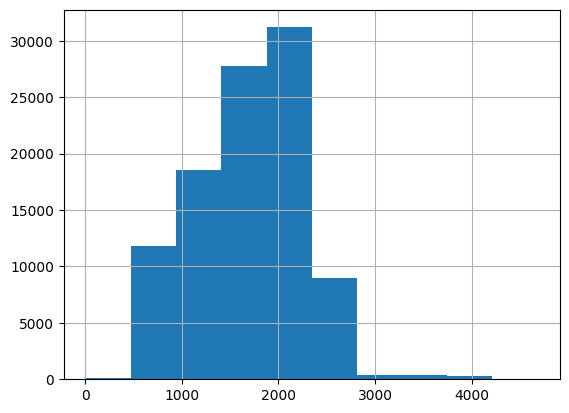

In [22]:
df['location_id'].hist()

In [23]:
t = df.groupby(['location_id'])['user_id'].nunique().reset_index()
[t['user_id'].min(), t['user_id'].max()]

[1, 6141]

количество пользователей и их просмотры на локации очень сильно отличается

In [24]:
t['user_id_gr'] = pd.qcut(t['user_id'], 5, duplicates='drop')
t.groupby('user_id_gr')['location_id'].count()

/tmp/ipykernel_713/1621392573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t.groupby('user_id_gr')['location_id'].count()


user_id_gr
(0.999, 3.0]      415
(3.0, 40.0]       124
(40.0, 6141.0]    134
Name: location_id, dtype: int64

На большинстве точек до 40 клиентов

In [25]:
df['date_create'] = df['datetime_create'].dt.date
df['date_create'] = pd.to_datetime(df['date_create'], format = '%Y-%m-%d')
df['time_create'] = df['datetime_create'].dt.time
df['time_create'] = pd.to_datetime(df['time_create'], format = '%H:%M:%S')

In [26]:
df['weekday_create'] = df['datetime_create'].dt.weekday

In [27]:
df['hour_create'] = df['datetime_create'].dt.hour

<Axes: xlabel='date_create'>

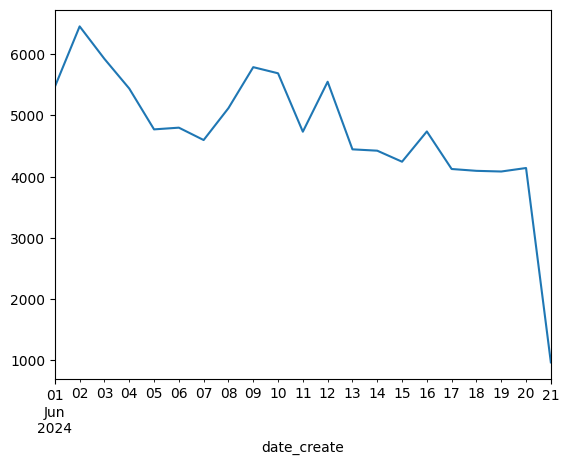

In [28]:
df.groupby('date_create')['event_id'].count().plot()

Активность пользователей в целом падает

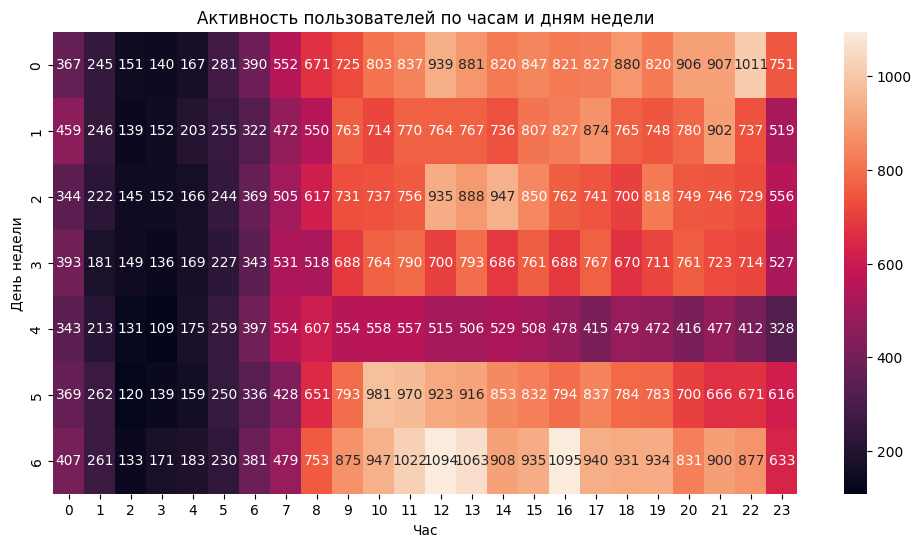

In [29]:
heatmap_data = pd.pivot_table(df, index = 'weekday_create', columns = 'hour_create', values= 'event_id', aggfunc= 'count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Активность пользователей по часам и дням недели")
plt.xlabel("Час")
plt.ylabel("День недели")
plt.show()

Наименьшая активность в четверг, пик - воскресение и понедельник

In [31]:
df.groupby('product_category')['product_id'].agg(['nunique','count'])

,nunique,count
product_category,,
инвентарь,4951,13870
обувь,4957,38150
одежда,11789,47597


In [32]:
df.groupby('product_gender')['product_id'].agg(['nunique','count'])

,nunique,count
product_gender,,
женский,6604,33277
мужской,8905,46888
унисекс,6188,19452


In [33]:
df.groupby('product_age')['product_id'].agg(['nunique','count'])

,nunique,count
product_age,,
взрослые,18298,88359
дети,3287,11027
малыши,112,231


In [34]:
df.groupby(['product_gender','product_age'])['product_id'].agg(['nunique','count'])

nunique  count
product_gender product_age                
женский        взрослые        5592  30057
               дети             966   3128
               малыши            46     92
мужской        взрослые        7386  40954
               дети            1460   5807
               малыши            59    127
унисекс        взрослые        5320  17348
               дети             861   2092
               малыши             7     12

In [35]:
df.groupby('brand_lvl')['product_id'].agg(['nunique','count'])

,nunique,count
brand_lvl,,
-1,7,17
-3,31,69
0,5864,25497
1,7206,31831
2,7280,39557
noinfo,1309,2646


Отрицательные бренды и нобренд не описаны в документации. Отрицательные точно выбросы

In [36]:
df = df[~ df['brand_lvl'].isin(['-1','-3'])]

In [37]:
df.groupby(['product_gender','brand_lvl'])['product_id'].count()

product_gender  brand_lvl
женский         0             7697
                1            11695
                2            13162
                noinfo         723
мужской         0            13203
                1            14849
                2            18272
                noinfo         564
унисекс         0             4597
                1             5287
                2             8123
                noinfo        1359
Name: product_id, dtype: int64

<Axes: >

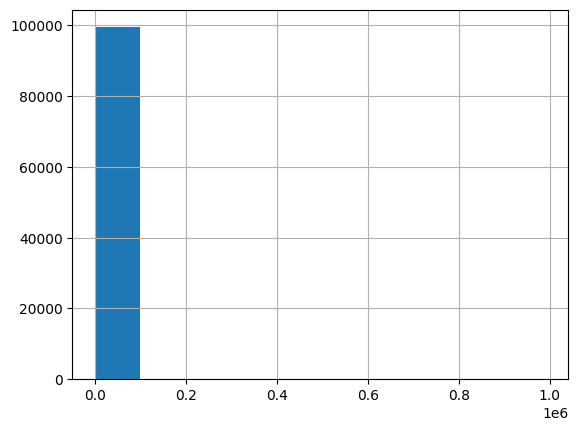

In [38]:
df['product_price'].hist()

Распределение цены с жирным хвостом

In [39]:
price_lower = df['product_price'].quantile(0.25) - 1.5 * df['product_price'].quantile(0.5)
price_upper = df['product_price'].quantile(0.75) + 1.5 * df['product_price'].quantile(0.5)

<Axes: >

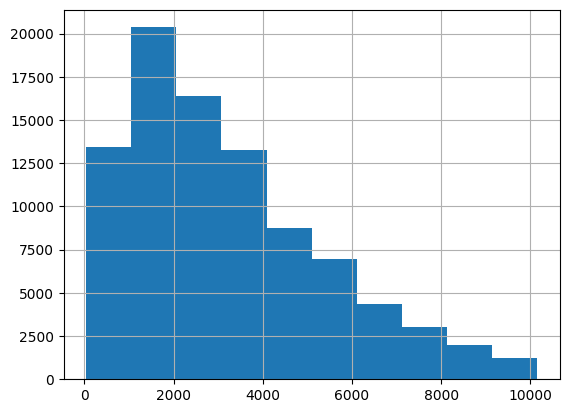

In [40]:
df[df['product_price'].between(price_lower, price_upper)]['product_price'].hist()

<Axes: >

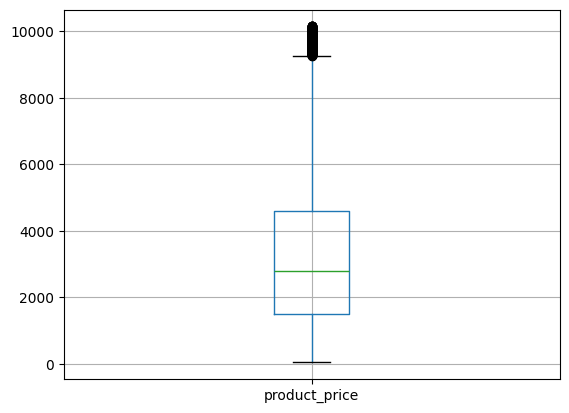

In [42]:
df[df['product_price'].between(price_lower, price_upper)][['product_price']].boxplot()

Добавим несколько новых колонок

In [ ]:
df['any_delivery'] = df[['product_is_delivery', 'product_is_pick_point','product_is_pick_up']].max(axis = 1)

In [43]:
df['product_is_cheap'] = df['product_price'].apply(lambda x: 1 if x <= 5000 else 0)

In [ ]:
bins = [-np.inf, 5000, 10000, 15000, 20000, 25000, np.inf]

df['product_price_gr'] = pd.cut(df['product_price'],bins = bins)

In [45]:
total_views = len(df)
total_add_to_cart = df['add_to_cart_flag'].sum()
total_orders = df['create_order_flag'].sum()    

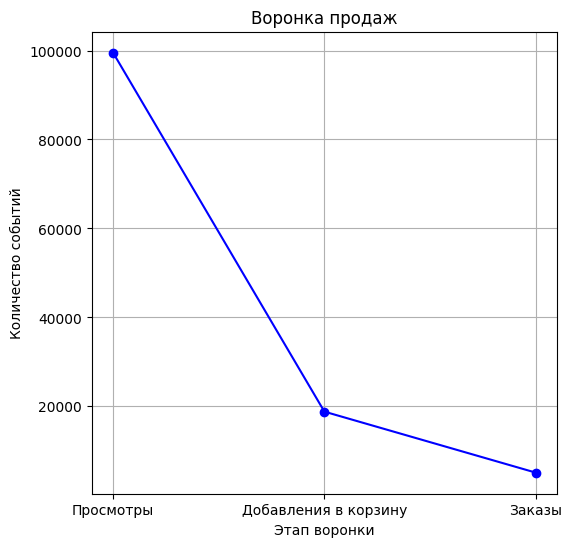

In [46]:
stages = ['Просмотры', 'Добавления в корзину', 'Заказы']
values = [total_views, total_add_to_cart, total_orders]

plt.figure(figsize=(6, 6))
plt.plot(stages, values, marker='o', linestyle='-', color='b')
plt.title("Воронка продаж")
plt.xlabel("Этап воронки")
plt.ylabel("Количество событий")
plt.grid(True)
plt.show()

Какая доля пользователей соверишили покупки?

In [47]:
round(df[df['create_order_flag']==1]['user_id'].nunique() / df['user_id'].nunique() * 100,1)

10.1

In [48]:
user_order_count = df[df['create_order_flag']==1].groupby('user_id')['event_id'].count().reset_index().rename({'event_id':'order_count'}, axis = 1)
user_order_count['order_count'].value_counts()

order_count
1     1907
2      688
3      216
4      106
5       41
6       29
7       18
8        8
9        3
14       2
15       1
10       1
13       1
17       1
16       1
12       1
Name: count, dtype: int64

In [49]:
df = df.merge(user_order_count, how = 'left', on = 'user_id')

In [50]:
df['order_count'] = df['order_count'].fillna(0)

In [51]:
df.groupby('order_count')['user_is_authorized'].mean()

order_count
0.0     0.830026
1.0     0.990004
2.0     0.995091
3.0     0.998963
4.0     0.989680
5.0     1.000000
6.0     0.997831
7.0     0.991561
8.0     0.986784
9.0     1.000000
10.0    1.000000
12.0    1.000000
13.0    1.000000
14.0    1.000000
15.0    1.000000
16.0    1.000000
17.0    1.000000
Name: user_is_authorized, dtype: float64

In [52]:
# можно ли купить товар без авторизации?
df[df['create_order_flag']==1].groupby('user_is_authorized')['create_order_flag'].agg(['count'])

,count
user_is_authorized,
0,44
1,5018


чисто теоритически можно

In [53]:
np.random.seed(42)
df['randonm_int'] = np.random.randint(0, 10000, size=len(df))

# Исследование

## Гипотезы


1. Конверсия пользователей на мобильных устройствах выше
2. Конверсия дорогих покупок реже 
3. Женские товары конвертируются чаще  
4. Отсутствие возможности доставки снижает конверсию
5. Авторизованные пользователи чаще покупают


Посчитаем конверсию для разных категорий пользователей, товаров, вариантов доставки

А также проверим статистичсекую значимость гипотез 

## Общие сведения

In [54]:
df.columns

Index(['device_type', 'event_id', 'user_id', 'user_is_authorized',
       'location_id', 'create_timestamp', 'product_id', 'product_is_pick_up',
       'product_is_pick_point', 'product_is_delivery', 'product_is_now',
       'product_price', 'product_category', 'product_gender', 'product_age',
       'brand_lvl', 'add_to_cart_flag', 'create_order_flag', 'datetime_create',
       'device_gr', 'date_create', 'time_create', 'weekday_create',
       'hour_create', 'any_delivery', 'product_is_cheap', 'product_price_gr',
       'order_count', 'randonm_int'],
      dtype='object')

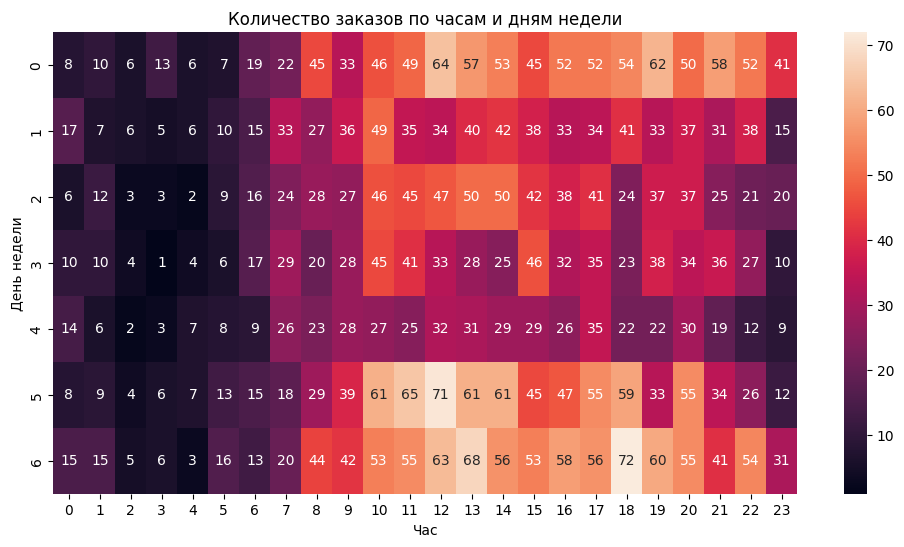

In [95]:
heatmap_data = pd.pivot_table(df, index = 'weekday_create', columns = 'hour_create', values= 'create_order_flag', aggfunc= 'sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Количество заказов по часам и дням недели")
plt.xlabel("Час")
plt.ylabel("День недели")
plt.show()

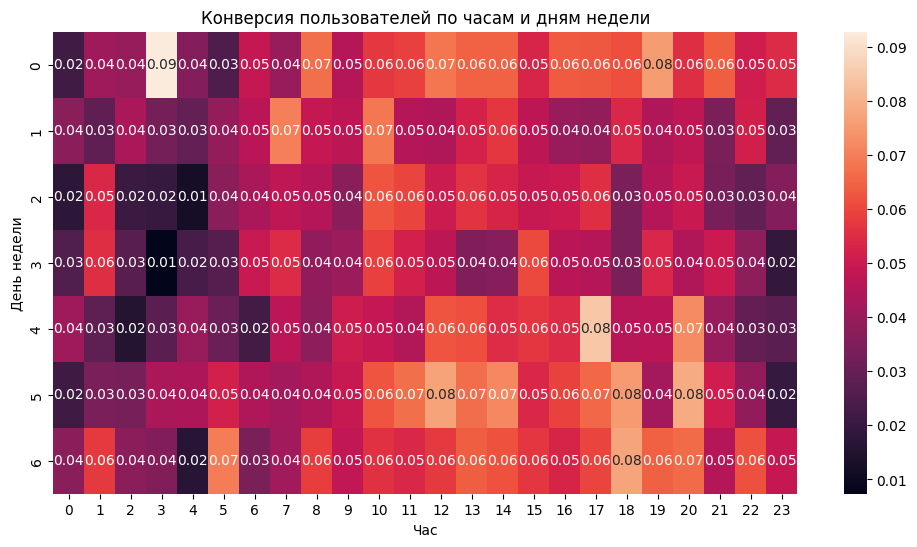

In [96]:
heatmap_data = pd.pivot_table(df, index = 'weekday_create', columns = 'hour_create', values= 'create_order_flag', aggfunc= 'mean').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f")
plt.title("Конверсия пользователей по часам и дням недели")
plt.xlabel("Час")
plt.ylabel("День недели")
plt.show()

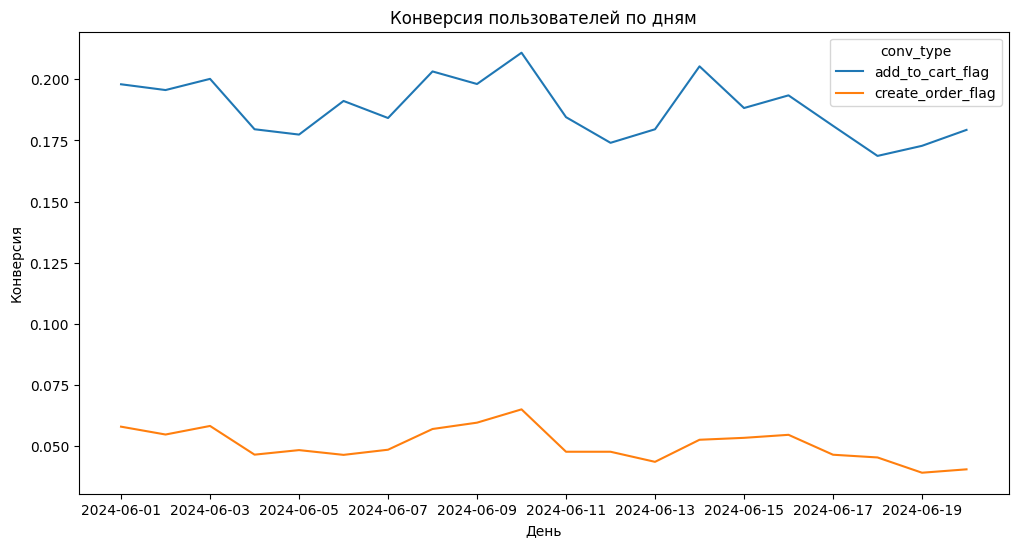

In [101]:
t = df[df['date_create'] != '21.06.2024'].groupby('date_create').agg({'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'}).stack().reset_index()
t = t.rename({'level_1':'conv_type', 0:'conv'}, axis =1)

plt.figure(figsize=(12, 6))
sns.lineplot(t, x = 'date_create', y = 'conv', hue = 'conv_type')

plt.title("Конверсия пользователей по дням" )
plt.xlabel("День")
plt.ylabel("Конверсия")

plt.show()

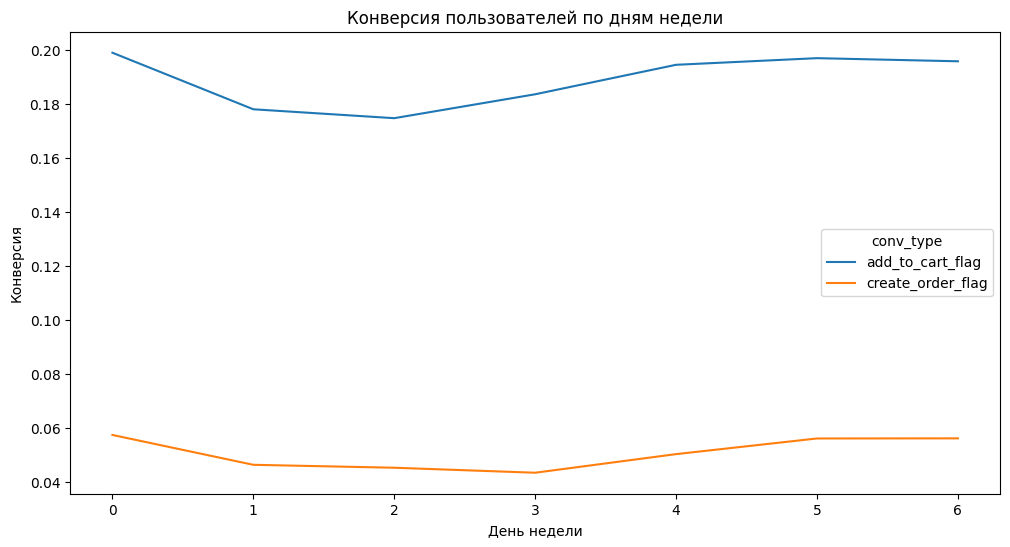

In [58]:
t = df[df['date_create'] != '21.06.2024'].groupby('weekday_create').agg({'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'}).stack().reset_index()
t = t.rename({'level_1':'conv_type', 0:'conv'}, axis =1)

plt.figure(figsize=(12, 6))
sns.lineplot(t, x = 'weekday_create', y = 'conv', hue = 'conv_type')

plt.title("Конверсия пользователей по дням недели")
plt.xlabel("День недели")
plt.ylabel("Конверсия")
plt.show()

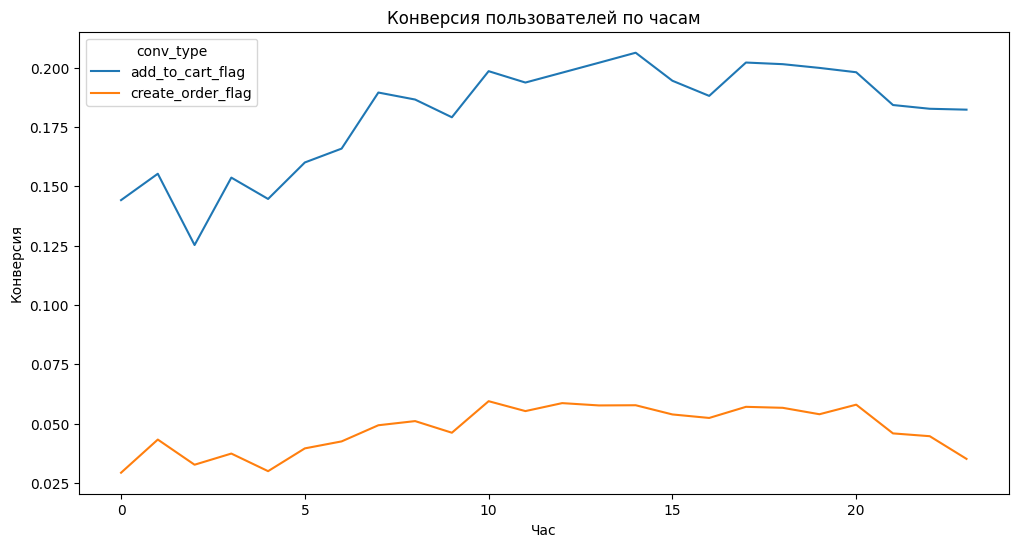

In [59]:
t = df[df['date_create'] != '21.06.2024'].groupby('hour_create').agg({'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'}).stack().reset_index()
t = t.rename({'level_1':'conv_type', 0:'conv'}, axis =1)

plt.figure(figsize=(12, 6))
sns.lineplot(t, x = 'hour_create', y = 'conv', hue = 'conv_type')

plt.title("Конверсия пользователей по часам")
plt.xlabel("Час")
plt.ylabel("Конверсия")
plt.show()

In [60]:
views = len(df)
cart_conv = round(df['add_to_cart_flag'].mean() * 100, 1)
order_conv = round(df['create_order_flag'].mean() * 100, 1)
order_cart = round(order_conv/cart_conv  * 100, 1)
conv = round(df['create_order_flag'].sum() / df['add_to_cart_flag'].sum()  * 100, 1)

In [61]:
print(f'Всего было просмотрено: {views} товаров')
print(f'Конверсия в корзину: {cart_conv}')
print(f'Конверсия в заказ: {order_conv}')
print(f'Доля заказов из корзины: {order_cart}')

Всего было просмотрено: 99531 товаров
Конверсия в корзину: 18.9
Конверсия в заказ: 5.1
Доля заказов из корзины: 27.0


In [62]:
money_views = df['product_price'].sum()
money_cart_conv = round(df[df['add_to_cart_flag'] == 1]['product_price'].sum() / money_views * 100, 1)
money_order_conv = round(df[df['create_order_flag'] == 1]['product_price'].sum() / money_views * 100, 1)
money_order_cart = round(money_order_conv / money_cart_conv  * 100, 1)

In [63]:
print(f'Всего было просмотрено на: {money_views} рублей')
print(f'Конверсия в корзину: {money_cart_conv}')
print(f'Конверсия в заказ: {money_order_conv}')
print(f'Доля заказов из корзины: {money_order_cart}')

Всего было просмотрено на: 512367971 рублей
Конверсия в корзину: 14.6
Конверсия в заказ: 3.9
Доля заказов из корзины: 26.7


В целом показатели конверсии по деньгам и товарам одинаковое за исключением конверсии в корзину

Все переменные - категориальные.

Gоэтому использовать метод Хи-квадрат для анализа наличия зависимости

In [111]:
from scipy.stats import chi2_contingency

def pvalue_order_conv(x):
    
    conv_types = df.groupby(x, observed=False).agg({'event_id': 'count', 'add_to_cart_flag': ['mean', 'sum'], 'create_order_flag': ['mean', 'sum']})
    conv_types.columns = ['_'.join(map(str, col)).strip() for col in conv_types.columns.values]
    conv_types['order_cart'] = conv_types['create_order_flag_sum'] / conv_types['add_to_cart_flag_sum'] 
    conv_types = conv_types.drop(['add_to_cart_flag_sum', 'create_order_flag_sum'], axis = 1)
    
    conversion_table = df.groupby(x, observed=False)['create_order_flag'].value_counts().unstack()
    _, p_value, _, _ = chi2_contingency(conversion_table)
    
    display(conv_types)
    print(f"p-value для показателя {x}: {p_value:.4f}")

## 1. Конверсия пользователей на мобильных устройствах выше

In [67]:
pvalue_order_conv('device_gr')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
device_gr,,,,
desktop,11775,0.116093,0.026667,0.229700
mobile,87756,0.198391,0.054105,0.272717


p-value для показателя device_gr: 0.0000


Конверсия у пользователей мобильных устройств больше, чем у пользователей ПК

In [68]:
df.groupby(['device_gr'])['user_is_authorized'].mean()

device_gr
desktop    0.326285
mobile     0.944403
Name: user_is_authorized, dtype: float64

In [69]:
df.groupby(['device_gr','user_is_authorized'])['create_order_flag'].agg(['count','mean'])

count      mean
device_gr user_is_authorized                 
desktop   0                    7933  0.001891
          1                    3842  0.077824
mobile    0                    4879  0.005944
          1                   82877  0.056940

Есть разница между товарами, которые просматривают на ПК и мобилках?

In [70]:
df.pivot_table(index = 'product_category', columns='device_gr', values = 'product_price', aggfunc='median')

device_gr,desktop,mobile
product_category,,
инвентарь,5399.0,4159.0
обувь,4899.0,4549.0
одежда,2239.0,1889.0


In [71]:
df.pivot_table(index = 'product_age', columns='device_gr', values = 'product_price', aggfunc='median')

device_gr,desktop,mobile
product_age,,
взрослые,3999.0,3099.0
дети,2799.0,2159.0
малыши,2299.0,1819.0


In [72]:
df.pivot_table(index = 'brand_lvl', columns='device_gr', values = 'product_price', aggfunc=['median','count'])

median           count       
device_gr desktop  mobile desktop mobile
brand_lvl                               
0          6249.0  5699.0    3403  22094
1          3799.0  2799.0    3412  28419
2          2499.0  1999.0    4555  35002
noinfo     4699.0  3684.0     405   2241

In [73]:
df.groupby(['device_gr','user_is_authorized'])['add_to_cart_flag'].mean()

device_gr  user_is_authorized
desktop    0                     0.054204
           1                     0.243883
mobile     0                     0.111498
           1                     0.203506
Name: add_to_cart_flag, dtype: float64

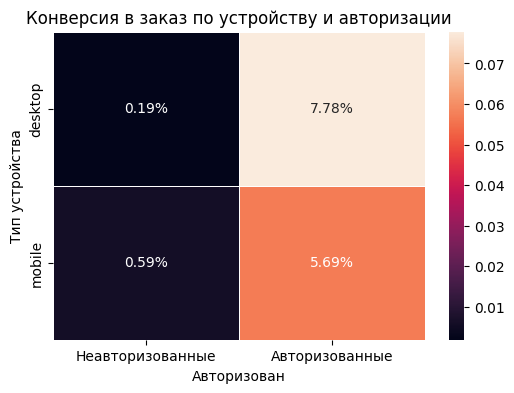

In [74]:
heatmap_data = df.groupby(['device_gr', 'user_is_authorized'])['create_order_flag'].mean().unstack()

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", linewidths=0.5)
plt.title("Конверсия в заказ по устройству и авторизации")
plt.xlabel("Авторизован")
plt.ylabel("Тип устройства")
plt.xticks(ticks=[0.5, 1.5], labels=["Неавторизованные", "Авторизованные"])
plt.show()

Среди пользователей ПК меньше авторизованных пользоватлей

Среди авторизованных пользователей конверсия на ПК выше, чем на мобильных устройствах, значит вид устройства не вляет на конверсию

## 6. Авторизованные пользователи чаще покупают

In [75]:
pvalue_order_conv('user_is_authorized')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
user_is_authorized,,,,
0,12812,0.076022,0.003434,0.045175
1,86719,0.205295,0.057865,0.281863


p-value для показателя user_is_authorized: 0.0000


У авторизованных пользователей конверсия выше

In [76]:
df.pivot_table(index = 'product_category', columns='user_is_authorized', values = 'product_price', aggfunc='median')

user_is_authorized,0,1
product_category,,
инвентарь,5599.0,3999.0
обувь,4899.0,4549.0
одежда,2199.0,1889.0


In [77]:
df.pivot_table(index = 'product_age', columns='user_is_authorized', values = 'product_price', aggfunc='median')

user_is_authorized,0,1
product_age,,
взрослые,3990.0,3119.0
дети,2799.0,2159.0
малыши,1889.0,1999.0


Для повышения конверсии можно стимулировать пользователя авторизоваться. Особенно, пользователей ПК!!! Например, 

На сайте для неавторизованных пользователей есть плашка "Хотите дешевле - Авторизуйтесь". Однако после авторизации скидка не применяется!!!

На данный момент есть возможность авторизоваться с помощью ВК - можно добавить возможность авторизации с помощью Тинькоф, Сбера 


2. Конверсия дорогих покупок реже 



In [78]:
df_cart = df[df['add_to_cart_flag'] == 1]
df_orders = df[df['create_order_flag'] == 1]

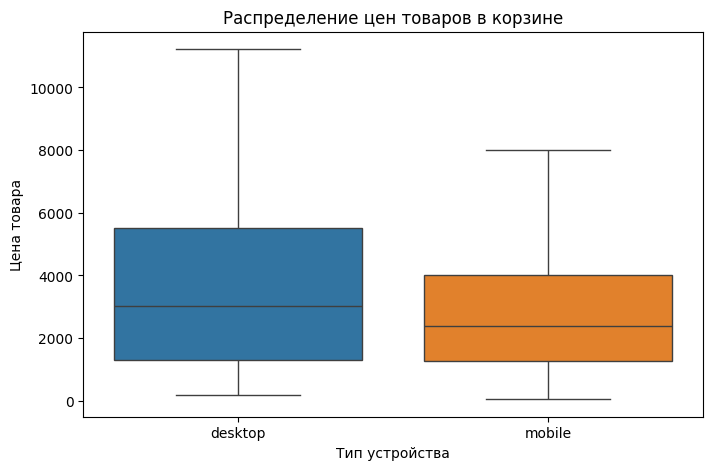

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot( data=df_orders, x="device_gr", y="product_price", hue = 'device_gr', showfliers=False)
plt.title("Распределение цен товаров в корзине")
plt.ylabel("Цена товара")
plt.xlabel("Тип устройства")
plt.show()

In [80]:
pvalue_order_conv('product_is_cheap')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_cheap,,,,
0,27475,0.141328,0.033667,0.238218
1,72056,0.206700,0.057414,0.277763


p-value для показателя product_is_cheap: 0.0000


In [81]:
pvalue_order_conv('product_price_gr')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_price_gr,,,,
"(-inf, 5000.0]",72056,0.206700,0.057414,0.277763
"(5000.0, 10000.0]",17713,0.152656,0.034833,0.228180
"(10000.0, 15000.0]",4062,0.123831,0.032004,0.258449
"(15000.0, 20000.0]",2339,0.131253,0.029500,0.224756
"(20000.0, 25000.0]",1053,0.110161,0.029440,0.267241
"(25000.0, inf]",2308,0.109619,0.033795,0.308300


p-value для показателя product_price_gr: 0.0000


Чем дороже товар, тем реже его добавляют в корзину, однако конверсия дорогих товаров держится на одном уровне вне зависимости от добавления в корзину

Рассмотрим какие категории товаров покупают среди дешевых и дорогих

In [82]:
t = df.groupby(['product_category','product_is_cheap']).agg({'event_id': 'count', 'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'})
t['cart_order_conv'] = t['create_order_flag'] / t['add_to_cart_flag']
t

event_id  add_to_cart_flag  \
product_category product_is_cheap                               
инвентарь        0                     6318          0.147040   
                 1                     7527          0.221071   
обувь            0                    16066          0.147641   
                 1                    22084          0.193126   
одежда           0                     5091          0.114319   
                 1                    42445          0.211215   

                                   create_order_flag  cart_order_conv  
product_category product_is_cheap                                      
инвентарь        0                          0.034821         0.236814  
                 1                          0.065099         0.294471  
обувь            0                          0.037221         0.252108  
                 1                          0.052934         0.274091  
одежда           0                          0.021017         0.183849  
                 1                          0.058381         0.276408

In [83]:
t = df.groupby(['product_age','product_is_cheap']).agg({'event_id': 'count', 'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'})
t['cart_order_conv'] = t['create_order_flag'] / t['add_to_cart_flag']
t

event_id  add_to_cart_flag  create_order_flag  \
product_age product_is_cheap                                                  
взрослые    0                    25985          0.139811           0.033750   
            1                    62289          0.201015           0.055275   
дети        0                     1470          0.168707           0.032653   
            1                     9556          0.244768           0.071683   
малыши      0                       20          0.100000           0.000000   
            1                      211          0.161137           0.042654   

                              cart_order_conv  
product_age product_is_cheap                   
взрослые    0                        0.241398  
            1                        0.274978  
дети        0                        0.193548  
            1                        0.292860  
малыши      0                        0.000000  
            1                        0.264706

In [84]:
t = df.groupby(['product_gender','product_is_cheap']).agg({'event_id': 'count', 'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'})
t['cart_order_conv'] = t['create_order_flag'] / t['add_to_cart_flag']
t

event_id  add_to_cart_flag  \
product_gender product_is_cheap                               
женский        0                     7967          0.156144   
               1                    25310          0.208613   
мужской        0                    13943          0.135337   
               1                    32945          0.198998   
унисекс        0                     5565          0.135130   
               1                    13801          0.221578   

                                 create_order_flag  cart_order_conv  
product_gender product_is_cheap                                      
женский        0                          0.031882         0.204180  
               1                          0.046582         0.223295  
мужской        0                          0.036936         0.272920  
               1                          0.063196         0.317572  
унисекс        0                          0.028032         0.207447  
               1                          0.063474         0.286462

In [85]:
t = df.groupby(['brand_lvl','product_is_cheap']).agg({'event_id': 'count', 'add_to_cart_flag': 'mean', 'create_order_flag': 'mean'})
t['cart_order_conv'] = t['create_order_flag'] / t['add_to_cart_flag']
t

event_id  add_to_cart_flag  create_order_flag  \
brand_lvl product_is_cheap                                                  
0         0                    14445          0.139495           0.034891   
          1                    11052          0.176891           0.044879   
1         0                     7281          0.135421           0.027606   
          1                    24550          0.200611           0.056497   
2         0                     4659          0.162481           0.044859   
          1                    34898          0.222849           0.063213   
noinfo    0                     1090          0.114679           0.010092   
          1                     1556          0.152314           0.030848   

                            cart_order_conv  
brand_lvl product_is_cheap                   
0         0                        0.250124  
          1                        0.253708  
1         0                        0.203854  
          1                        0.281624  
2         0                        0.276090  
          1                        0.283657  
noinfo    0                        0.088000  
          1                        0.202532

Хотя конверсия дорогих товаров отличается в разы, конверсия из корзины в заказ отличается не так существенно

Необходимо повысить конверсию в корзину для дорогих товаров

Можно простимулировать пользователя добавлять товары в корзину, например:

Добавить плашку "Лучший выбор" / "Рекомендовано редакцией"

на многих дорогих товаров нет отзывов и оценок - стимулировать пользователя к обратной связи с помощью дополнительных бонусов, скидки на седующие покупки

## 3. Женские товары конвертируются чаще  

In [86]:
pvalue_order_conv('product_gender')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_gender,,,,
женский,33277,0.196051,0.043063,0.219651
мужской,46888,0.180067,0.055387,0.307592
унисекс,19366,0.196737,0.053289,0.270866


p-value для показателя product_gender: 0.0000


Пользователи больше покупают мужские товары

## 4. Отсутствие возможности доставки снижает конверсию

In [87]:
pvalue_order_conv('any_delivery')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
any_delivery,,,,
0,2621,0.037390,0.014117,0.377551
1,96910,0.192746,0.051852,0.269019


p-value для показателя any_delivery: 0.0000


In [88]:
pvalue_order_conv('product_is_delivery')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_delivery,,,,
0,7337,0.100586,0.016764,0.166667
1,92194,0.195663,0.053572,0.273796


p-value для показателя product_is_delivery: 0.0000


In [89]:
pvalue_order_conv('product_is_pick_up')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_pick_up,,,,
0,27436,0.133474,0.026899,0.201529
1,72095,0.209654,0.059976,0.286073


p-value для показателя product_is_pick_up: 0.0000


In [90]:
pvalue_order_conv('product_is_pick_point')

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_pick_point,,,,
0,7872,0.125000,0.025279,0.202236
1,91659,0.194122,0.053055,0.273310


p-value для показателя product_is_pick_point: 0.0000


Гипотеза подтвердилась, у товаров, у которых нет возможности доставки конверсия ниже

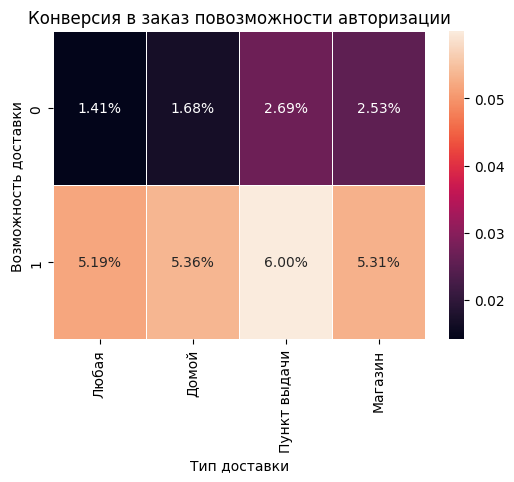

In [246]:
delivery_conv = pd.DataFrame( [0,1], columns=['delivery_is_avaliable'])
for delivery in ['any_delivery','product_is_delivery','product_is_pick_up','product_is_pick_point']:

    t = df.groupby(delivery)['create_order_flag'].mean().reset_index().rename({'create_order_flag':f'{delivery}_conv'}, axis = 1)

    delivery_conv = delivery_conv.merge(t, how = 'left', left_on = 'delivery_is_avaliable', right_on=delivery).drop(delivery, axis = 1)

delivery_conv

plt.figure(figsize=(6, 4))
sns.heatmap(delivery_conv.drop('delivery_is_avaliable', axis = 1), annot=True, fmt=".2%", linewidths=0.5)
plt.title("Конверсия в заказ повозможности авторизации")
plt.xlabel("Тип доставки")
plt.ylabel("Возможность доставки")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Любая', 'Домой', 'Пункт выдачи', 'Магазин'])
plt.show()

возможные пути решения:

улучшение логистики - исключить товары у которых нет варинтов доставки (как это вообще??)

Не интуитивно: сейчас на сайте  доставка бесплатна от 1000 рублей. Изменить условия бесплатной доставки, например, от 1500 рублей, и добавить плашку "для беслатной доставки закажите один из товаров"

## Конверсия по каждому признаку

In [ ]:
from scipy.stats import chi2_contingency

conv_list = []
def pvalue_order_conv(x):
    
    conv_types = df.groupby(x, observed=False).agg({'event_id': 'count', 'add_to_cart_flag': ['mean', 'sum'], 'create_order_flag': ['mean', 'sum']})
    conv_types.columns = ['_'.join(map(str, col)).strip() for col in conv_types.columns.values]
    conv_types['order_cart'] = conv_types['create_order_flag_sum'] / conv_types['add_to_cart_flag_sum'] 
    conv_types = conv_types.drop(['add_to_cart_flag_sum', 'create_order_flag_sum'], axis = 1)
    
    conversion_table = df.groupby(x, observed=False)['create_order_flag'].value_counts().unstack()
    _, p_value, _, _ = chi2_contingency(conversion_table)
    
    display(conv_types)
    print(f"p-value для показателя {x}: {p_value:.4f}")

    cart_diff = conv_types['add_to_cart_flag_mean'].max() - conv_types['add_to_cart_flag_mean'].min()
    order_diff = conv_types['create_order_flag_mean'].max() - conv_types['create_order_flag_mean'].min()
    cart_order_diff = conv_types['order_cart'].max() - conv_types['order_cart'].min()

    list_diff = [x, p_value, cart_diff, order_diff, cart_order_diff]
    conv_list.append(list_diff)

In [123]:
cat_columns = [
'product_category',
'product_gender',
'product_age',
'brand_lvl',
'device_gr',
'product_price_gr']

In [124]:
conv_columns = list(df.select_dtypes('int64').drop(['create_order_flag','randonm_int','product_id','location_id','user_id','product_price'], axis = 1).columns) + cat_columns

In [128]:
conv_list = []
for elem in conv_columns:
    pvalue_order_conv(elem)

,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
user_is_authorized,,,,
0,12812,0.076022,0.003434,0.045175
1,86719,0.205295,0.057865,0.281863


p-value для показателя user_is_authorized: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_pick_up,,,,
0,27436,0.133474,0.026899,0.201529
1,72095,0.209654,0.059976,0.286073


p-value для показателя product_is_pick_up: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_pick_point,,,,
0,7872,0.125000,0.025279,0.202236
1,91659,0.194122,0.053055,0.273310


p-value для показателя product_is_pick_point: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_delivery,,,,
0,7337,0.100586,0.016764,0.166667
1,92194,0.195663,0.053572,0.273796


p-value для показателя product_is_delivery: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_now,,,,
0,56614,0.173950,0.043911,0.252437
1,42917,0.208053,0.060023,0.288498


p-value для показателя product_is_now: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
add_to_cart_flag,,,,
0,80754,0.0,0.000000,NaN
1,18777,1.0,0.269585,0.269585


p-value для показателя add_to_cart_flag: nan


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
any_delivery,,,,
0,2621,0.037390,0.014117,0.377551
1,96910,0.192746,0.051852,0.269019


p-value для показателя any_delivery: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_is_cheap,,,,
0,27475,0.141328,0.033667,0.238218
1,72056,0.206700,0.057414,0.277763


p-value для показателя product_is_cheap: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_category,,,,
инвентарь,13845,0.187288,0.051282,0.273814
обувь,38150,0.173971,0.046317,0.266235
одежда,47536,0.200837,0.054380,0.270766


p-value для показателя product_category: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_gender,,,,
женский,33277,0.196051,0.043063,0.219651
мужской,46888,0.180067,0.055387,0.307592
унисекс,19366,0.196737,0.053289,0.270866


p-value для показателя product_gender: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_age,,,,
взрослые,88274,0.182998,0.048939,0.267426
дети,11026,0.234627,0.066479,0.283340
малыши,231,0.155844,0.038961,0.250000


p-value для показателя product_age: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
brand_lvl,,,,
0,25497,0.155705,0.039220,0.251889
1,31831,0.185699,0.049888,0.268652
2,39557,0.215739,0.061051,0.282986
noinfo,2646,0.136810,0.022298,0.162983


p-value для показателя brand_lvl: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
device_gr,,,,
desktop,11775,0.116093,0.026667,0.229700
mobile,87756,0.198391,0.054105,0.272717


p-value для показателя device_gr: 0.0000


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_price_gr,,,,
"(-inf, 5000.0]",72056,0.206700,0.057414,0.277763
"(5000.0, 10000.0]",17713,0.152656,0.034833,0.228180
"(10000.0, 15000.0]",4062,0.123831,0.032004,0.258449
"(15000.0, 20000.0]",2339,0.131253,0.029500,0.224756
"(20000.0, 25000.0]",1053,0.110161,0.029440,0.267241
"(25000.0, inf]",2308,0.109619,0.033795,0.308300


p-value для показателя product_price_gr: 0.0000


In [129]:
conv_df = pd.DataFrame(conv_list, columns = ['name', 'pvalue', 'cart_diff', 'order_diff', 'cart_order_diff'])

In [130]:
conv_df.sort_values(by = 'order_diff', ascending = False)

,name,pvalue,cart_diff,order_diff,cart_order_diff
5,add_to_cart_flag,NaN,1.000000,0.269585,0.000000
0,user_is_authorized,9.045460e-151,0.129273,0.054431,0.236688
11,brand_lvl,1.551863e-43,0.078929,0.038753,0.120002
6,any_delivery,6.061420e-18,0.155356,0.037735,0.108532
3,product_is_delivery,3.215461e-43,0.095077,0.036807,0.107129
1,product_is_pick_up,8.154750e-100,0.076180,0.033077,0.084544
13,product_price_gr,1.265598e-48,0.097082,0.027974,0.083545
2,product_is_pick_point,6.806860e-27,0.069122,0.027776,0.071074
10,product_age,1.934067e-14,0.078783,0.027518,0.033340
12,device_gr,5.746443e-37,0.082298,0.027438,0.043017


## Спящие красавицы

Найдем пользователей с товары в корзине и без заказа

In [134]:
sleeping_beauty = df[(df['add_to_cart_flag'] == 1 ) & (df['create_order_flag'] == 0)]

In [144]:
sleeping_users = (sleeping_beauty.groupby('user_id')
                                            .agg({'event_id': 'count', 'product_price': 'sum'})
                                            .sort_values(by='product_price', ascending=False)
                                            .reset_index()
                                            .rename({'event_id':'sleeping_count', 'product_price':'sleeping_price'}, axis = 1)
                  )

sleeping_users

,user_id,sleeping_count,sleeping_price
0,1450107,11,561089
1,503402,3,227970
2,1720398,15,202645
3,1847505,4,201496
4,1418743,3,192497
...,...,...,...
7276,1339161,1,139
7277,1438023,1,129
7278,1313948,1,99
7279,719910,1,79


In [180]:
sleeping_users_count = sleeping_users['user_id'].count()
sleeping_users_count_prodcut = sleeping_users['sleeping_count'].sum()
sleeping_users_price = round(sleeping_users['sleeping_price'].sum() / 1000 /1000, 1)

print(f'За исследуемый период {sleeping_users_count} пользователей добавило {sleeping_users_count_prodcut} товаров на сумму {sleeping_users_price} млн. рублей')

За исследуемый период 7281 пользователей добавило 13715 товаров на сумму 55.3 млн. рублей


Нужно заставить их заказать что нибудь из корзины

In [181]:
median_check = df[df['create_order_flag']==0]['product_price'].median()

sleeping_users['more_than_median_check'] = sleeping_users['sleeping_price'].apply(lambda x: 1 if x >= median_check else 0)

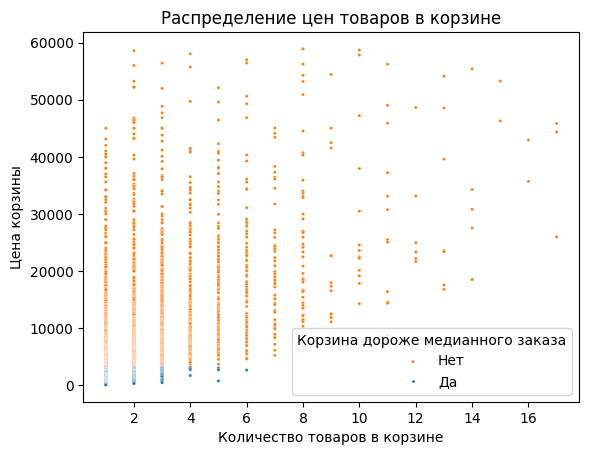

In [183]:
sns.scatterplot(sleeping_users[sleeping_users['sleeping_price'] <= sleeping_users['sleeping_price'].quantile(0.99)], 
                x='sleeping_count', 
                y='sleeping_price', 
                hue = 'more_than_median_check',
                s=5, 
                color=".15")

plt.title("Распределение цен товаров в корзине")
plt.ylabel("Цена корзины")
plt.xlabel("Количество товаров в корзине")

plt.legend(title = 'Корзина дороже медианного заказа', labels = ['Нет', 'Да'])

plt.show()

Для пользователей с корзиной дороже чем средний чек заказа можем предложить:

10% скидку на все товары в корзине

Напоминание с помощью push для мобилок, с помощью email для ПК - если в корзине есть товар, которые скоро закончится


# Выводы:

In [185]:
print('На данный момент:')
print(f'Конверсия в корзину: {cart_conv}')
print(f'Конверсия в заказ: {order_conv}')
print(f'Доля заказов из корзины: {order_cart}')

На данный момент:
Конверсия в корзину: 18.9
Конверсия в заказ: 5.1
Доля заказов из корзины: 27.0


In [187]:
print('Конверсия в заказ у пользователей мобильного приложения в 2 раза выше, конверсии пользователей ПК')

conv_types = df.groupby('device_gr').agg({'event_id': 'count', 'add_to_cart_flag': ['mean', 'sum'], 'create_order_flag': ['mean', 'sum']})
conv_types.columns = ['_'.join(map(str, col)).strip() for col in conv_types.columns.values]
conv_types['order_cart'] = conv_types['create_order_flag_sum'] / conv_types['add_to_cart_flag_sum'] 
conv_types = conv_types.drop(['add_to_cart_flag_sum', 'create_order_flag_sum'], axis = 1)
conv_types

Конверсия в заказ у пользователей мобильного приложения в 2 раза выше, конверсии пользователей ПК


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
device_gr,,,,
desktop,11775,0.116093,0.026667,0.229700
mobile,87756,0.198391,0.054105,0.272717


In [190]:
print('Основная причина - небольшое количество авторизованных пользователей')

df.groupby(['device_gr'])['user_is_authorized'].mean().reset_index()

Основная причина - небольшое количество авторизованных пользователей


,device_gr,user_is_authorized
0,desktop,0.326285
1,mobile,0.944403


При этом среди авторизованных пользователей конверсия на ПК выше


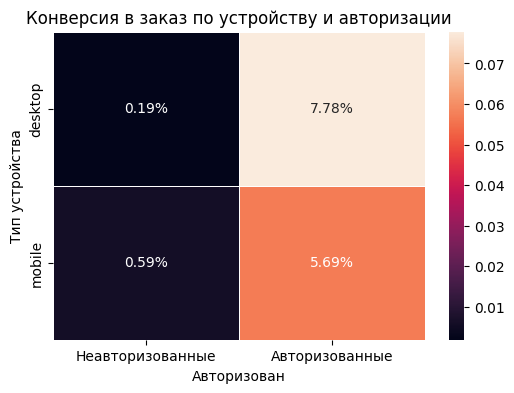

In [191]:
print('При этом среди авторизованных пользователей конверсия на ПК выше')

heatmap_data = df.groupby(['device_gr', 'user_is_authorized'])['create_order_flag'].mean().unstack()

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", linewidths=0.5)
plt.title("Конверсия в заказ по устройству и авторизации")
plt.xlabel("Авторизован")
plt.ylabel("Тип устройства")
plt.xticks(ticks=[0.5, 1.5], labels=["Неавторизованные", "Авторизованные"])
plt.show()

Для повышения конверсии можно стимулировать пользователя авторизоваться. 

Особенно, пользователей ПК!!! Например, 

На сайте для неавторизованных пользователей есть плашка "Хотите дешевле - Авторизуйтесь". Однако после авторизации скидка не применяется!!!

На данный момент есть возможность авторизоваться с помощью ВК - можно добавить возможность авторизации с помощью Тинькоф, Сбера 

In [198]:
print('Чем дороже товар, тем реже его добавляют в корзину')
print('Jднако конверсия дорогих товаров держится на одном уровне вне зависимости от добавления в корзину')


conv_types = df.groupby('product_price_gr', observed=False).agg({'event_id': 'count', 'add_to_cart_flag': ['mean', 'sum'], 'create_order_flag': ['mean', 'sum']})
conv_types.columns = ['_'.join(map(str, col)).strip() for col in conv_types.columns.values]
conv_types['order_cart'] = conv_types['create_order_flag_sum'] / conv_types['add_to_cart_flag_sum'] 
conv_types = conv_types.drop(['add_to_cart_flag_sum', 'create_order_flag_sum'], axis = 1)
conv_types

Чем дороже товар, тем реже его добавляют в корзину
Jднако конверсия дорогих товаров держится на одном уровне вне зависимости от добавления в корзину


,event_id_count,add_to_cart_flag_mean,create_order_flag_mean,order_cart
product_price_gr,,,,
"(-inf, 5000.0]",72056,0.206700,0.057414,0.277763
"(5000.0, 10000.0]",17713,0.152656,0.034833,0.228180
"(10000.0, 15000.0]",4062,0.123831,0.032004,0.258449
"(15000.0, 20000.0]",2339,0.131253,0.029500,0.224756
"(20000.0, 25000.0]",1053,0.110161,0.029440,0.267241
"(25000.0, inf]",2308,0.109619,0.033795,0.308300


Необходимо повысить конверсию в корзину для дорогих товаров

Можно простимулировать пользователя добавлять товары в корзину, например:

Добавить плашку "Лучший выбор" / "Рекомендовано редакцией"

на многих дорогих товаров нет отзывов и оценок - стимулировать пользователя к обратной связи с помощью дополнительных бонусов, скидки на седующие покупки

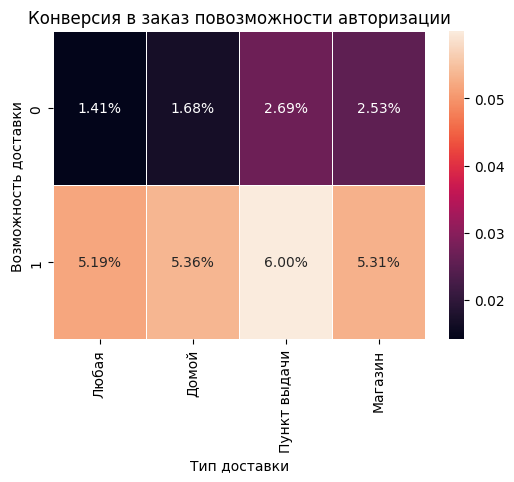

In [241]:
delivery_conv = pd.DataFrame( [0,1], columns=['delivery_is_avaliable'])
for delivery in ['any_delivery','product_is_delivery','product_is_pick_up','product_is_pick_point']:

    t = df.groupby(delivery)['create_order_flag'].mean().reset_index().rename({'create_order_flag':f'{delivery}_conv'}, axis = 1)

    delivery_conv = delivery_conv.merge(t, how = 'left', left_on = 'delivery_is_avaliable', right_on=delivery).drop(delivery, axis = 1)

delivery_conv

plt.figure(figsize=(6, 4))
sns.heatmap(delivery_conv.drop('delivery_is_avaliable', axis = 1), annot=True, fmt=".2%", linewidths=0.5)
plt.title("Конверсия в заказ повозможности авторизации")
plt.xlabel("Тип доставки")
plt.ylabel("Возможность доставки")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Любая', 'Домой', 'Пункт выдачи', 'Магазин'])
plt.show()

У товаров, у которых нет возможности доставки конверсия ниже

Возможные пути решения:

улучшение логистики - исключить товары у которых нет варинтов доставки (как это вообще??)

Не интуитивно: сейчас на сайте  доставка бесплатна от 1000 рублей. Изменить условия бесплатной доставки, например, от 1500 рублей, и добавить плашку "для беслатной доставки закажите один из товаров"

In [ ]:
sleeping_users_count = sleeping_users['user_id'].count()
sleeping_users_count_prodcut = sleeping_users['sleeping_count'].sum()
sleeping_users_price = round(sleeping_users['sleeping_price'].sum() / 1000 /1000, 1)

print(f'За исследуемый период {sleeping_users_count} пользователей добавило {sleeping_users_count_prodcut} товаров на сумму {sleeping_users_price} млн. рублей')

За исследуемый период 7281 пользователей добавило 13715 товаров на сумму 55.3 млн. рублей


Спящие красавицы

In [242]:
sleeping_users_count = sleeping_users['user_id'].count()
sleeping_users_count_prodcut = sleeping_users['sleeping_count'].sum()
sleeping_users_price = round(sleeping_users['sleeping_price'].sum() / 1000 /1000, 1)

print(f'За исследуемый период {sleeping_users_count} пользователей добавило {sleeping_users_count_prodcut} товаров на сумму {sleeping_users_price} млн. рублей')

За исследуемый период 7281 пользователей добавило 13715 товаров на сумму 55.3 млн. рублей


Нужно заставить их заказать что нибудь из корзины

Для пользователей с корзиной дороже чем средний чек заказа можем предложить:

10% скидку на все товары в корзине

Напоминание с помощью push для мобилок, с помощью email для ПК - если в корзине есть товар, которые скоро закончится

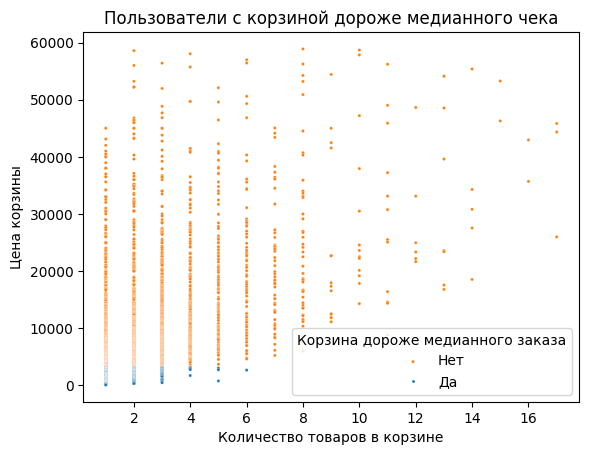

In [245]:
sns.scatterplot(sleeping_users[sleeping_users['sleeping_price'] <= sleeping_users['sleeping_price'].quantile(0.99)], 
                x='sleeping_count', 
                y='sleeping_price', 
                hue = 'more_than_median_check',
                s=5, 
                color=".15")

plt.title("Пользователи с корзиной дороже медианного чека")
plt.ylabel("Цена корзины")
plt.xlabel("Количество товаров в корзине")

plt.legend(title = 'Корзина дороже медианного заказа', labels = ['Нет', 'Да'])

plt.show()